###### Content under Creative Commons Attribution license CC-BY 4.0, code under BSD 3-Clause License © 2017 L.A. Barba, N.C. Clementi

# Lead in Lipstick

After completing [Lesson 1](http://go.gwu.edu/engcomp2lesson1) and [Lesson 2](http://go.gwu.edu/engcomp2lesson2) of "Take off with stats," Module 2 of our course in _Engineering Computations_, here we'll work out a full example of what you can do with all that you've learned.

This example is based on the lecture by Prof. Kristin Sainani at Stanford, ["Exploring real data: lead in lipstick,"](https://youtu.be/nlKIT-_b2jU) of her online course ["Statistics in Medicine,"](https://lagunita.stanford.edu/courses/Medicine/MedStats-SP/SelfPaced/about). We followed along her narration, searched online for the sources she cited and the data from the FDA studies, and worked out the descriptive statistics using Python. We hope you'll enjoy it!

## In the news

In 2007, some alarming reports appeared in the media: a US consumer-rights group had tested 33 brand-name lipsticks, and found that 61% had detectable lead levels of 0.03 to 0.65 parts per million (ppm). A full one-third of the lipsticks tested exceeded the lead level set by the US Food and Drug Administration (FDA) as the limit for candy: 0.1 ppm. Here are some media reports:

* Reuters published on Oct. 12, 2007: [Lipsticks contain lead, consumer group says](https://www.reuters.com/article/us-lipstick-lead/lipsticks-contain-lead-consumer-group-says-idUSN1140964520071012)—it quotes a doctor as saying: "Lead builds up in the body over time and lead-containing lipstick applied several times a day, every day, can add up to significant exposure levels."
* CTV.ca News published [FDA to examine claim of lead levels in lipstick](http://www.ctvnews.ca/fda-to-examine-claim-of-lead-levels-in-lipstick-1.259946)—it quoted one member of the Campaign for Safe Cosmetics as saying: "We want the companies to immediately re-formulate their products to get the lead out and ultimately, really we need to change the laws and force these companies to be accountable to women's health."
* The New York Times was more measured in [The Claim: Some Red Lipstick Brands Contain High Lead Levels](http://www.nytimes.com/2007/11/13/health/13real.html) (Nov. 13, 2007), concluding: "Studies have found that lead in lipstick is not a cause for concern, but research is continuing."

The FDA did carry out new studies in 2009 and 2012 to try to determine if lead content was a concern for lipstick users. These new studies generated some new scary headlines!

* On the Washington Post: [400 lipsticks found to contain lead, FDA says](https://www.washingtonpost.com/business/economy/400-lipstick-brands-contain-lead-fda-says/2012/02/14/gIQAhOyeDR_story.html?utm_term=.e3622592e0e7)—the FDA is quoted as stating "We do not consider the lead levels we found in the lipsticks to be a safety concern…"
* In Time Magazine: [What’s in Your Lipstick? FDA Finds Lead in 400 Shades](http://healthland.time.com/2012/02/15/whats-in-your-lipstick-fda-finds-lead-in-400-shades/)—a campaigner is quoted as saying: "We want to see the FDA recommend a limit based on the lowest level a company can achieve, like candy manufacturers are required."

Should lipstick users be concerned? Let's fact-check those scary headlines using our stats chops with Python!

## The FDA studies

We located a web page of the US Food and Drug Administration, titled [Limiting Lead in Lipstick and Other Cosmetics](https://www.fda.gov/cosmetics/productsingredients/products/ucm137224.htm#reference1), that describes their efforts to assess the safety concerns from lead impurities in cosmetics. The web page includes data tables for the initial study in 2009, with 22 lipsticks, and the expanded study in 2012, with 400 lipsticks. 

We copied these tables from the web page and created CSV files with the data. If you have a clone of all our lesson files, you already have the data. But if you downloaded this notebook on its own, you may need to get the data separately. See the Note below.

Let's begin by loading our Python libraries for data analysis: `numpy`, `pandas` and `pyplot`. We'll also load the `rcParams` module for setting Matplotlib's plotting parameters, and set the font family and size to serif 16 points.

In [3]:
import numpy
import pandas
from matplotlib import pyplot
%matplotlib inline

#Import rcParams to set font styles
from matplotlib import rcParams

#Set font style and size 
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

##### Note:

We'll be reading the data from CSV files using `pandas`. If you don't have the data files locally, change the code in the cell below to read the data from the files hosted in our repository:

```Python
URL = 'http://go.gwu.edu/engcomp2data3a'
leadlips2009 = pandas.read_csv(URL)
```

In [2]:
# Load the FDA 2009 data set using pandas, and assign it to a dataframe
leadlips2009 = pandas.read_csv("../data/FDA2009-lipstickdata.csv")

As always, we take a quick peek at the data, now saved in a `pandas` dataframe named `leadlips2009`, and then we get a view of its distribution by plotting a histograms.

In [3]:
leadlips2009[0:5]

,count,Sample,Brand,Parent company,Pb ppm
0,1,1a,Cover Girl,Procter & Gamble,3.06
1,2,1b,Cover Girl,Procter & Gamble,3.05
2,3,2,Revlon,Revlon,2.38
3,4,3,Cover Girl,Procter & Gamble,2.24
4,5,4,Body Shop,L'Oreal,1.79


Let's see a histogram of the data column containing the lead content. It's easy with `pandas`, because we can use the column label as a plot argument.

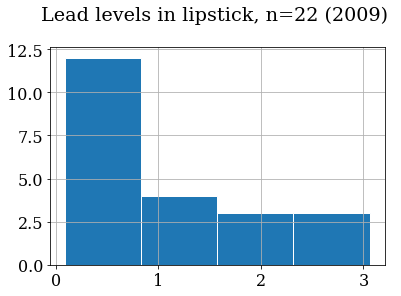

In [4]:
leadlips2009.hist(column='Pb ppm', bins=4, edgecolor='white')
pyplot.title('Lead levels in lipstick, n=22 (2009) \n');

Above, we used the built-in plotting capability of `pandas`. Just for kicks, let's get the same plot but using `pyplot` directly. To do that, remember that we need the data in a NumPy array, for which we use the `Series.values` method.

In [6]:
lead2009 = leadlips2009['Pb ppm'].values


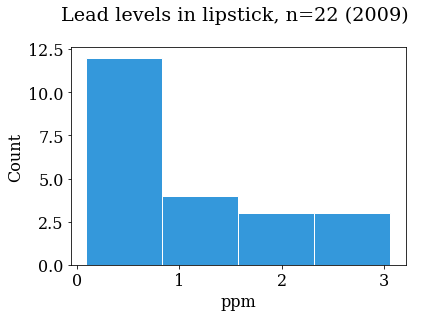

In [13]:
pyplot.figure(figsize=(6,4))
pyplot.hist(lead2009, bins=4, color='#3498db', histtype='barstacked', edgecolor='white') 
#pyplot.hist(lead2009, bins=4, color='#3498db', histtype='bar', edgecolor='white') 
pyplot.title('Lead levels in lipstick, n=22 (2009) \n')
pyplot.xlabel('ppm')
pyplot.ylabel('Count');

The histograms look the same, except for style. If you are following along with Sainani's lecture, however, you'll note some differences. We confirm that the data is the same by getting the descriptive statistics shown 4-min into the video:

In [14]:
print('The mean value is {:.2f}'.format(leadlips2009['Pb ppm'].mean()))
print('The median is {:.2f}'.format(leadlips2009['Pb ppm'].median()))
print('The standard deviation is {:.2f}'.format(leadlips2009['Pb ppm'].std()))
print('The maximum value is {:.2f}'.format(leadlips2009['Pb ppm'].max()))

The mean value is 1.07
The median is 0.73
The standard deviation is 0.96
The maximum value is 3.06


All of these match the statistics shown in the video. We do see some slight differences in the percentile values, however. Check them out:

In [15]:
print('The 99 percentile is {:.2f}'.format(leadlips2009['Pb ppm'].quantile(.99)))
print('The 95 percentile is {:.2f}'.format(leadlips2009['Pb ppm'].quantile(.95)))
print('The 90 percentile is {:.2f}'.format(leadlips2009['Pb ppm'].quantile(.90)))
print('The 75 percentile is {:.2f}'.format(leadlips2009['Pb ppm'].quantile(.75)))

The 99 percentile is 3.06
The 95 percentile is 3.02
The 90 percentile is 2.37
The 75 percentile is 1.69


#####  Challenge question

Despite the small difference in some percentile values from those shown on the video, we do think this is the same data that Sainani uses in her example. Look carefully at the histograms: can you explain the differences? (Play around with the plots here as much as you need to explain it.)

Let's load the data for the extended study in 2012. 

##### Note:
If you don't have the data files locally, change the code in the cell below to read the data from the files hosted in our repository:

```Python
URL = 'http://go.gwu.edu/engcomp2data3b'
leadlips2012 = pandas.read_csv(URL)
```

In [16]:
# Load the FDA 2012 data set using pandas, and assign it to a dataframe
leadlips2012 = pandas.read_csv("../data/FDA2012-lipstickdata.csv")

Take a quick peek at the first few rows of the dataframe we just created, and then make a histogram of the column containing the lead values (notice that it has a different label than the previous dataframe).

In [10]:
leadlips2012[0:5]

,Sample #,Brand,Parent company,Lead (ppm)
0,1,Maybelline,L'Oreal USA,7.19
1,2,L'Oreal,L'Oreal USA,7.00
2,3,NARS,Shiseido,4.93
3,4,Cover Girl Queen,Procter & Gamble,4.92
4,5,NARS,Shiseido,4.89


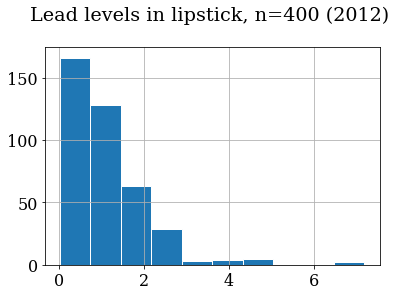

In [11]:
leadlips2012.hist(column='Lead (ppm)', bins=10, edgecolor='white')
pyplot.title('Lead levels in lipstick, n=400 (2012) \n');

Now, let's get the descriptive statistics for this data set, and confirm that they match with those shown in Dr. Sainani's video. 

In [12]:
print('The mean value is {:.2f}'.format(leadlips2012['Lead (ppm)'].mean()))
print('The median is {:.2f}'.format(leadlips2012['Lead (ppm)'].median()))
print('The standard deviation is {:.2f}'.format(leadlips2012['Lead (ppm)'].std()))
print('The maximum value is {:.2f}'.format(leadlips2012['Lead (ppm)'].max()))

The mean value is 1.11
The median is 0.89
The standard deviation is 0.97
The maximum value is 7.19


The mean value, median, and standard deviation did not change much between the 2009 and 2012 studies, even though the earlier study only tested 22 samples. As Prof. Sainani points out, this goes to show that you can begin to describe a feature even with modest sample sizes.

The maximum value in the second study was a lot higher: 7.19 compared to 3.06. The reason for seeing this higher maximum value in the later study is that, for a _right skewed_ distribution like this one, there are infrequent occurrences of a higher concentration of lead. These start to be detected with larger sample sizes.

Next, we compute a few percentiles (noticing slight differences with the values shown by Sainani).

In [13]:
print('The 99 percentile is {:.2f}'.format(leadlips2012['Lead (ppm)'].quantile(.99)))
print('The 95 percentile is {:.2f}'.format(leadlips2012['Lead (ppm)'].quantile(.95)))
print('The 90 percentile is {:.2f}'.format(leadlips2012['Lead (ppm)'].quantile(.90)))
print('The 75 percentile is {:.2f}'.format(leadlips2012['Lead (ppm)'].quantile(.75)))

The 99 percentile is 4.89
The 95 percentile is 2.74
The 90 percentile is 2.22
The 75 percentile is 1.49


In the previous lesson, you learned to make box plots using `pyplot`, which requires extracting the values of the data series of interest into NumPy arrays. It turns out, `pandas` can make box plots directly with a column of the dataframe. 

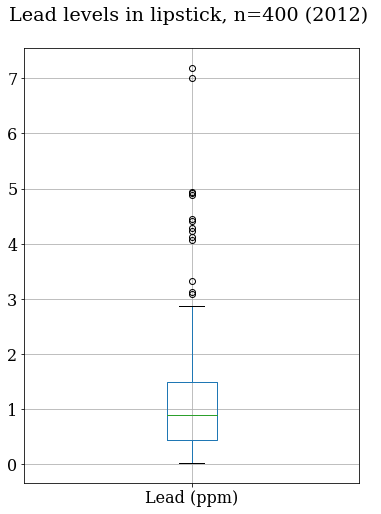

In [14]:
leadlips2012.boxplot(column='Lead (ppm)', figsize=(6,8))
pyplot.title('Lead levels in lipstick, n=400 (2012) \n');

The box plot also indicates a right skewed distribution, and shows a number of outliers on the high end of the range: some lipsticks have an especially high level of lead.

## Lead exposure from lipstick

A European study of exposure to various cosmetic products [Ref. 2] offers some useful statistics about lipstick use. In figure 6, the paper shows a histogram of lipstick applied by the participants in the study. The distribution is right skewed: most users apply a moderate amount of lipstick daily, but there are a few heavy users in the tail of the distribution. The number of participants was 30,000, and the summary statistics are:

* mean value = 24.61 mg/day,
* median = 17.11 mg/day,
* minimum = 0.13 mg/day,
* maximum = 217.53 mg/day
* 95th percentile = 72.51 mg/day

Prof. Sainani suggests the following exercise: suppose that users ingest half of the lipstick they apply daily—seems like a conservative estimate, given that some lipstick will end up on cups, napkins, and (as Sainani amusingly points out) other people. We'd like to calculate:

1. the typical lead exposure from lipstick, using the medians
2. the highest daily lead exposure from lipstick, using the maxima

From the 2012 FDA study of lead in lipstick: the median is 0.89 ppm (µg/g) and the maximum is 7.19 ppm. From the European study on exposure to cosmetics, the median daily usage of lipstick is 17.11 mg, and the maximum is 217.53. Now… keep your units straight!

$ 1 \mu\text{g} = 10^{-3} \text{mg} = 10^{-6} \text{g}$

In [15]:
# Typical user: 0.89 µg/g * 17.11 mg/day (divide by 1000 to get µg)
print('The typical daily exposure to lead from lipstick is {:.4f} µg/day.'.format(0.89 *17.11/1000))
print('Half of this amount is ingested: {:.4f} µg/day.'.format(0.89 *17.11/1000/2))

The typical daily exposure to lead from lipstick is 0.0152 µg/day.
Half of this amount is ingested: 0.0076 µg/day.


In [16]:
# Maximum usage: 7.19 µg/g * 217.53 mg/day / 1000 to get µg
print('The maximum daily exposure to lead from lipstick is {:.2f} µg/day.'.format(7.19 *217.53/1000))
print('Half of this amount is ingested: {:.2f} µg/day.'.format(7.19 *217.53/1000/2))

The maximum daily exposure to lead from lipstick is 1.56 µg/day.
Half of this amount is ingested: 0.78 µg/day.


The maximum daily exposure is 100 times larger than the typical exposure, based on the median. Note that this maximum occurs for one user over 30,000 (the size of the study sample), and one lipstick over 400—so it's a chance of one in 12 million!

## Is this bad?

The US Food and Drug Administration provides a recommended _maximum_ lead level of 0.1 ppm in candy to be consumed by small children [3]. But most food products are well below the maximum. 
For example, the FDA data on 40 samples of milk chocolate in the years 1991–2002 showed a mean lead level of 0.025 ppm [4]. That's of course much lower than the concentration of lead in lipstick, but the _consumption_ of chocolate is much higher! Forbes reported that the average American eats about 9.5 lbs (4.3 kg) of chocolate each year [6].

In [17]:
print('The average American consumes {:.1f} grams of chocolate per day.'.format(4.3*1000/365))
print('This amounts to {:.2f} µg of lead exposure from chocolate (mean of FDA data).'.format(4.3*1000/365*0.025))

The average American consumes 11.8 grams of chocolate per day.
This amounts to 0.29 µg of lead exposure from chocolate (mean of FDA data).


Compared to the median exposure to lead from lipstick of 0.0076 µg per day, the exposure from chocolate is almost 40 times higher!

Clearly the consumer group that generated all those headlines was scaremongering. And now you have the tools to fact-check many of those scary health-related "fake news."

## References

1. [Limiting Lead in Lipstick and Other Cosmetics](https://www.fda.gov/cosmetics/productsingredients/products/ucm137224.htm#reference1), US Food and Drug Administration.
2. European consumer exposure to cosmetic products, a framework for conducting population exposure assessments  (2007). Hall, B., et al., _Food and Chemical Toxicology_ **45**(11): 2097-2108. [Available on PubMed.](https://www.ncbi.nlm.nih.gov/pubmed/17683841)
3. US FDA Guidance for Industry: [Lead in Candy Likely To Be Consumed Frequently by Small Children: Recommended Maximum Level and Enforcement Policy](https://www.fda.gov/Food/GuidanceRegulation/GuidanceDocumentsRegulatoryInformation/ucm077904.htm) (2005, revised 2006).
4. US FDA [Supporting Document for Recommended Maximum Level for Lead in Candy Likely To Be Consumed Frequently by Small Children](https://www.fda.gov/food/foodborneillnesscontaminants/metals/ucm172050.htm#lead) (2006).
5. [The World's Biggest Chocolate Consumers](https://www.forbes.com/sites/niallmccarthy/2015/07/22/the-worlds-biggest-chocolate-consumers-infographic/#5399969b4484), Forbes, July 22nd 2015.

### Recommended viewing

This lesson was based on the followign lecture from ["Statistics in Medicine,"](https://lagunita.stanford.edu/courses/Medicine/MedStats-SP/SelfPaced/about), a free course in Stanford Online by Prof. Kristin Sainani:
* [Exploring real data: lead in lipstick](https://youtu.be/nlKIT-_b2jU)

In [18]:
# Execute this cell to load the notebook's style sheet, then ignore it
from IPython.core.display import HTML
css_file = '../style/custom.css'
HTML(open(css_file, "r").read())